In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('jobs_for_ML.csv', sep='\t')

df = df.drop(['Unnamed: 0', 'index'], axis = 1)
df

,Rating,Founded,Competitors,Salary_NotHour,Employer_est.,AVG_Size,Python,R,AWS,Excel,...,na.1,research,junior,na.2,na.3,senior,Type_of_ownership,Industry,Sector,Revenue
0,3.8,1973,0,1,0,750.5,1,0,0,1,...,1,0,0,0,1,0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million
1,3.4,1984,0,1,0,10000.0,1,0,0,0,...,1,0,0,0,1,0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion
2,4.8,2010,0,1,0,750.5,1,0,0,1,...,1,0,0,0,1,0,Company - Private,Security Services,Business Services,$100 to $500 million
3,3.8,1965,1,1,0,3000.5,1,0,0,0,...,1,0,0,0,1,0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion
4,2.9,1998,1,1,0,125.5,1,0,0,1,...,1,0,0,0,1,0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Appli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,3.6,2017,1,1,0,10000.0,0,0,0,0,...,0,0,0,1,0,1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion
688,3.9,1830,1,1,0,10000.0,0,0,1,0,...,0,0,0,1,0,1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion
689,4.4,2006,1,1,0,3000.5,1,0,1,0,...,0,0,0,0,0,1,Company - Public,Internet,Information Technology,$100 to $500 million
690,2.6,1984,0,1,0,750.5,0,0,0,1,...,1,0,0,1,1,0,College / University,Colleges & Universities,Education,Unknown / Non-Appli


In [2]:
df_model = pd.get_dummies(df)
df_model

,Rating,Founded,Competitors,Salary_NotHour,Employer_est.,AVG_Size,Python,R,AWS,Excel,...,Revenue_$10 to $25 million,Revenue_$10+ billion,Revenue_$100 to $500 million,Revenue_$2 to $5 billion,Revenue_$25 to $50 million,Revenue_$5 to $10 billion,Revenue_$5 to $10 million,Revenue_$50 to $100 million,Revenue_$500 million to $1 billion,Revenue_Unknown / Non-Appli
0,3.8,1973,0,1,0,750.5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.4,1984,0,1,0,10000.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.8,2010,0,1,0,750.5,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3.8,1965,1,1,0,3000.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.9,1998,1,1,0,125.5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,3.6,2017,1,1,0,10000.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
688,3.9,1830,1,1,0,10000.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
689,4.4,2006,1,1,0,3000.5,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
690,2.6,1984,0,1,0,750.5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
target_correlations = df.corr()['AVG_Salary'].apply(abs).sort_values()
target_correlations[-20:]

research          0.062147
Descr._Length     0.081520
Excel             0.083098
Competitors       0.091112
manager           0.094886
AVG_Size          0.103002
mle               0.119249
Employer_est.     0.141052
AWS               0.178455
na.2              0.196042
na                0.196042
Salary_NotHour    0.246602
director          0.254080
Python            0.319747
data scientist    0.327785
na.1              0.347340
na.3              0.347340
senior            0.356203
analyst           0.375407
AVG_Salary        1.000000
Name: AVG_Salary, dtype: float64

In [4]:
selected_features = target_correlations[-21:].index

In [5]:
df_model_2 = df_model[selected_features]
df_model_2

,data engineer,research,Descr._Length,Excel,Competitors,manager,AVG_Size,mle,Employer_est.,AWS,...,na,Salary_NotHour,director,Python,data scientist,na.1,na.3,senior,analyst,AVG_Salary
0,0,0,2536.0,1,0,0,750.5,0,0,0,...,0,1,0,1,1,1,1,0,0,72000.0
1,0,0,4783.0,0,0,0,10000.0,0,0,0,...,0,1,0,1,1,1,1,0,0,87500.0
2,0,0,3461.0,1,0,0,750.5,0,0,0,...,0,1,0,1,1,1,1,0,0,85000.0
3,0,0,3883.0,0,1,0,3000.5,0,0,0,...,0,1,0,1,1,1,1,0,0,76500.0
4,0,0,2728.0,1,1,0,125.5,0,0,0,...,0,1,0,1,1,1,1,0,0,114500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0,0,5025.0,0,1,0,10000.0,0,0,0,...,1,1,0,0,0,0,0,1,0,111500.0
688,0,0,6162.0,0,1,0,10000.0,0,0,1,...,1,1,0,0,0,0,0,1,0,84500.0
689,1,0,6130.0,0,1,0,3000.5,0,0,1,...,0,1,0,1,0,0,0,1,0,102500.0
690,0,0,3078.0,1,0,0,750.5,0,0,0,...,1,1,0,0,0,1,1,0,0,73500.0


<AxesSubplot:>

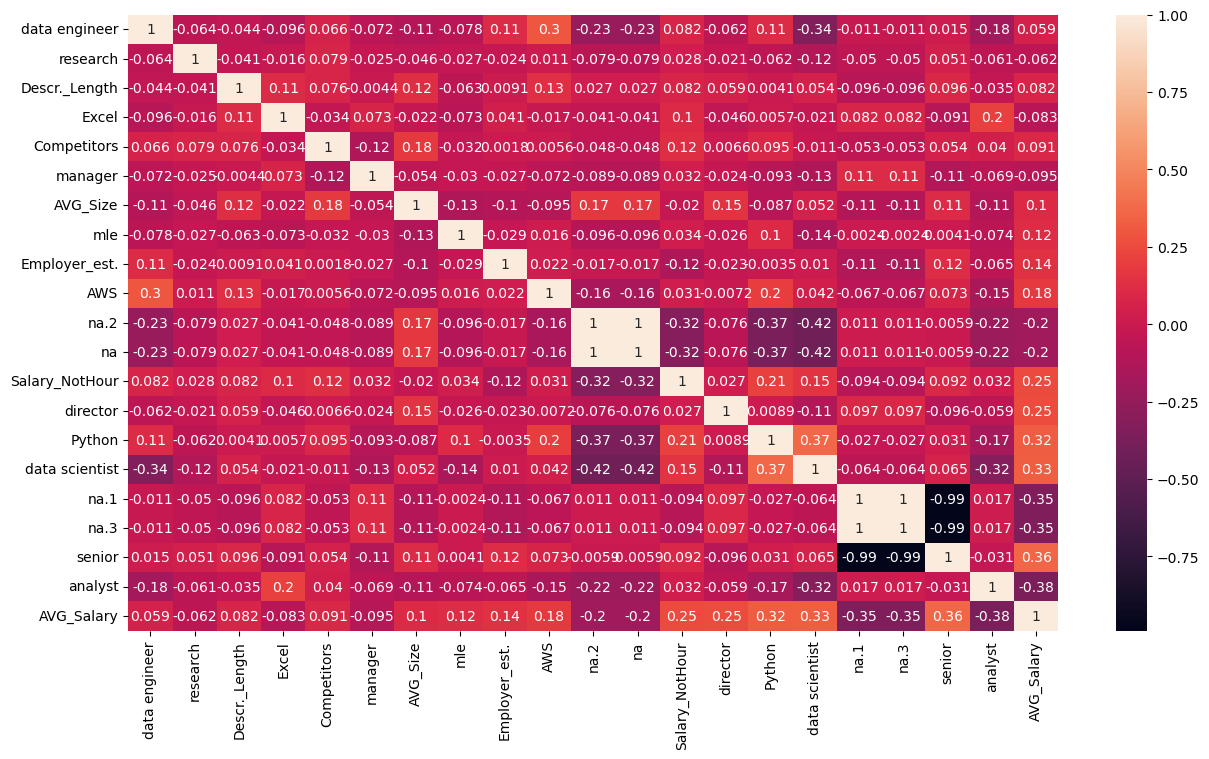

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df_model_2.corr(), annot=True)

In [7]:
X = df_model.drop(['AVG_Salary'], axis=1)
y = df_model['AVG_Salary']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

reg = LinearRegression()
forest = RandomForestRegressor(random_state=1)
gbreg = GradientBoostingRegressor(random_state=1)

In [10]:
reg.fit(X_train,y_train)
forest.fit(X_train,y_train)
gbreg.fit(X_train,y_train)

print(reg.score(X_test,y_test))
print(forest.score(X_test,y_test))
print(gbreg.score(X_test,y_test))

0.43884435915809583
0.719696354484391
0.5911552288813717


In [11]:
mean_absolute_error(y_test, reg.predict(X_test))

19252.78287034029

In [12]:
mean_absolute_error(y_test, forest.predict(X_test))

12033.432613908873

In [13]:
mean_absolute_error(y_test, gbreg.predict(X_test))

16191.492366131073

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,200,300],
    'max_depth':[None, 2,4,8],
    'min_samples_split': [2,4]
}

grid_search_forest = GridSearchCV(forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_gbreg = GridSearchCV(gbreg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search_forest.fit(X_train,y_train)
grid_search_gbreg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
grid_search_forest.best_estimator_.score(X_test,y_test)

0.7193791645513428

In [16]:
grid_search_gbreg.best_estimator_.score(X_test,y_test)

0.6939576661283887

In [17]:
mean_absolute_error(y_test, grid_search_forest.best_estimator_.predict(X_test))

12006.348681055157

In [18]:
mean_absolute_error(y_test, grid_search_gbreg.best_estimator_.predict(X_test))

11466.860103947081

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
forest.fit(X_train_scaled,y_train)
gbreg.fit(X_train_scaled,y_train)

print(forest.score(X_test_scaled,y_test))
print(gbreg.score(X_test_scaled,y_test))

0.720128452792469
0.5911552288813717


In [21]:
mean_absolute_error(y_test, reg.predict(X_test_scaled))

C:\Users\traue\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112159.64934019232

In [22]:
mean_absolute_error(y_test, forest.predict(X_test_scaled))

12008.1448441247

In [23]:
mean_absolute_error(y_test, gbreg.predict(X_test_scaled))

16191.492366131073

In [24]:
grid_search_forest = GridSearchCV(forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_gbreg = GridSearchCV(gbreg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search_forest.fit(X_train_scaled,y_train)
grid_search_gbreg.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search_forest.best_estimator_.score(X_test_scaled,y_test)

0.7194762591234489

In [26]:
grid_search_gbreg.best_estimator_.score(X_test_scaled,y_test)

0.6939576661283887

In [27]:
mean_absolute_error(y_test, grid_search_forest.best_estimator_.predict(X_test_scaled))

12028.85643485212

In [28]:
mean_absolute_error(y_test, grid_search_gbreg.best_estimator_.predict(X_test_scaled))

11466.860103947081

In [29]:
X = df_model_2.drop(['AVG_Salary'], axis=1)
y = df_model_2['AVG_Salary']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
reg.fit(X_train,y_train)
forest.fit(X_train,y_train)
gbreg.fit(X_train,y_train)

print(reg.score(X_test,y_test))
print(forest.score(X_test,y_test))
print(gbreg.score(X_test,y_test))

0.43088402325698927
0.6780461458942257
0.5154114019566303


In [32]:
mean_absolute_error(y_test, reg.predict(X_test))

19644.710301360632

In [33]:
mean_absolute_error(y_test, forest.predict(X_test))

13236.918944844125

In [34]:
mean_absolute_error(y_test, gbreg.predict(X_test))

17452.967516815694

In [35]:
grid_search_forest = GridSearchCV(forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_gbreg = GridSearchCV(gbreg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search_forest.fit(X_train,y_train)
grid_search_gbreg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search_forest.best_estimator_.score(X_test,y_test)

0.6649897519058061

In [37]:
grid_search_gbreg.best_estimator_.score(X_test,y_test)

0.6981515321904515

In [38]:
mean_absolute_error(y_test, grid_search_forest.best_estimator_.predict(X_test))

13636.148681055154

In [39]:
mean_absolute_error(y_test, grid_search_gbreg.best_estimator_.predict(X_test))

12289.006927096456

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
reg.fit(X_train_scaled,y_train)
forest.fit(X_train_scaled,y_train)
gbreg.fit(X_train_scaled,y_train)

print(reg.score(X_test_scaled,y_test))
print(forest.score(X_test_scaled,y_test))
print(gbreg.score(X_test_scaled,y_test))

0.4254539406170065
0.6779157090976116
0.5154114019566303


In [42]:
mean_absolute_error(y_test, forest.predict(X_test_scaled))

13239.149160671463

In [43]:
mean_absolute_error(y_test, gbreg.predict(X_test_scaled))

17452.967516815694

In [44]:
grid_search_forest = GridSearchCV(forest, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search_gbreg = GridSearchCV(gbreg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search_forest.fit(X_train_scaled,y_train)
grid_search_gbreg.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'max_depth': [None, 2, 4, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search_forest.best_estimator_.score(X_test_scaled,y_test)

0.6648341691767805

In [46]:
grid_search_gbreg.best_estimator_.score(X_test_scaled,y_test)

0.6981515321904515

In [47]:
mean_absolute_error(y_test, grid_search_forest.best_estimator_.predict(X_test_scaled))

13640.717026378896

In [48]:
mean_absolute_error(y_test, grid_search_gbreg.best_estimator_.predict(X_test_scaled))

12289.006927096456